# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

Iter     Function value   Gradient norm 
     0     3.153574e+01     7.264804e+00
 * time: 0.007359027862548828
     1     2.806068e+01     3.578040e+00
 * time: 0.034226179122924805
     2     1.813226e+01     3.238382e+00
 * time: 0.06670498847961426
     3     1.243786e+01     2.216790e+00
 * time: 0.09762811660766602
     4     1.097692e+01     3.025671e+00
 * time: 0.12162399291992188
     5     1.049241e+01     2.697579e+00
 * time: 0.14709210395812988
     6     9.620926e+00     1.304328e+00
 * time: 0.1718611717224121
     7     8.876101e+00     1.164376e+00
 * time: 0.19542717933654785
     8     8.395217e+00     1.008918e+00
 * time: 0.2212841510772705
     9     8.191077e+00     6.133845e-01
 * time: 0.25116610527038574
    10     8.190912e+00     1.201971e+00
 * time: 0.2701551914215088
    11     8.175534e+00     1.064365e+00
 * time: 0.28864407539367676
    12     8.102964e+00     4.988880e-01
 * time: 0.30866098403930664
    13     8.039085e+00     3.815425e-01
 * time: 

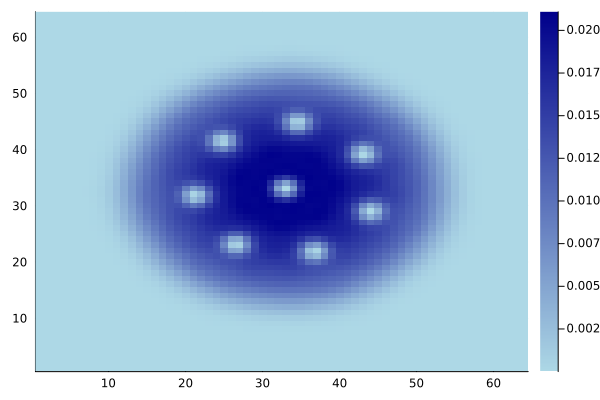

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential, and magnetic vector potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);


# Parameters
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

# Collect all the terms, build and run the model
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)